In [1]:
import pandas as pd
from matplotlib import pyplot
import seaborn as sns
from pandas.plotting import scatter_matrix
import math
import seaborn as sns
import numpy as np
from datetime import date, datetime

In [2]:
def average_calculator(a,b):
    if a == 0 or b == 0:
        return 0
    else:
        b_a = abs((a-b)/b)/100
        a_b = abs((b-a)/a)
        return (b_a,a_b)

In [3]:
#calcualte the maintenance delay of the application based on the last updated date (assumption is the longer the app was updated the least it is in support)

def maint_del(date):
    date = datetime.strptime(date, "%B %d, %Y").date()
    today = date.today()
    delay = today.year - date.year - ((today.month, today.day) < (date.month, date.day)) #delay since last update
    return delay

def maint_year(date):
    date = datetime.strptime(date, "%B %d, %Y").date()
    year = date.year
    return year
    

First will be your notebook jupyter with your calculation You will have to implement multiple functions:

In [4]:
#load_dataset()

def load_dataset(dataset):
    dataset = pd.read_csv("googleplaystore.csv",index_col=None,names=["App","Category","Rating","Reviews","Size","Installs","Type","Price","Content_Rating","Genres","Last_Updated","Current_Version","Android_Version"])
    dataset = dataset.drop(index=0)
    return dataset

source = "googleplaystore.csv"
raw_dataset = load_dataset(source)
raw_dataset.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Version,Android_Version
1,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
3,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
4,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
5,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
#print_summarize_dataset
def print_summarize_dataset(dataset):
    print(f"Describe Dataset:\n {dataset.describe()}\n")
    print(f"Dataset Information:\n {dataset.info()}\n")
    print(f"Dataset Count distinct:\n {dataset.nunique()}\n")
    print(f"Null records count: {dataset.isnull().sum()}")

print_summarize_dataset(raw_dataset)

Describe Dataset:
            App Category Rating Reviews                Size    Installs   Type  \
count    10841    10841   9367   10841               10841       10841  10840   
unique    9660       34     40    6002                 462          22      3   
top     ROBLOX   FAMILY    4.4       0  Varies with device  1,000,000+   Free   
freq         9     1972   1109     596                1695        1579  10039   

        Price Content_Rating Genres    Last_Updated     Current_Version  \
count   10841          10840  10841           10841               10833   
unique     93              6    120            1378                2832   
top         0       Everyone  Tools  August 3, 2018  Varies with device   
freq    10040           8714    842             326                1459   

       Android_Version  
count            10838  
unique              33  
top         4.1 and up  
freq              2451  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 1 to 108

In [6]:
#Show the unique values per columns
def unique_values(df):
    cat = df['Category'].unique()
    type = df['Type'].unique()
    com_rat = df['Content_Rating'].unique()
    df[['Genres1','Genres2']] = df['Genres'].str.split(';',1,expand=True)
    genr1 = df['Genres1'].unique()
    genr2 = df['Genres2'].unique()
    return cat, type, com_rat, genr1, genr2

unique_labels = unique_values(raw_dataset)
unique_labels

(array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
        'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
        'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
        'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
        'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
        'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
        'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
        'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
        '1.9'], dtype=object),
 array(['Free', 'Paid', nan, '0'], dtype=object),
 array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
        'Adults only 18+', 'Unrated', nan], dtype=object),
 array(['Art & Design', 'Auto & Vehicles', 'Beauty', 'Books & Reference',
        'Business', 'Comics', 'Communication', 'Dating', 'Education',
        'Entertainment', 'Events', 'Finance', 'Food & Drink',
        'Health & Fitness', 'House & Home

In [7]:
#Create unified numeric assignment to find corelations
def label_numerate(dataset):
    dataset['Category_Num'] = dataset['Category'].astype('category')
    dataset['Category_Num'] = dataset['Category_Num'].cat.codes
    dataset['Type_Num'] = dataset['Type'].astype('category')
    dataset['Type_Num'] = dataset['Type_Num'].cat.codes
    dataset['Content_Rating_Num'] = dataset['Type'].astype('category')
    dataset['Content_Rating_Num'] = dataset['Content_Rating_Num'].cat.codes
    dataset['Genres1_Num'] = dataset['Genres1'].astype('category')
    dataset['Genres1_Num'] = dataset['Genres1_Num'].cat.codes
    dataset['Genres2_Num'] = dataset['Genres2'].astype('category')
    dataset['Genres2_Num'] = dataset['Genres2_Num'].cat.codes
    return dataset

enumerated_dataset = label_numerate(raw_dataset)
enumerated_dataset

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Version,Android_Version,Genres1,Genres2,Category_Num,Type_Num,Content_Rating_Num,Genres1_Num,Genres2_Num
1,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,Art & Design,None,1,1,1,3,-1
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,Art & Design,Pretend Play,1,1,1,3,5
3,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,Art & Design,None,1,1,1,3,-1
4,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,Art & Design,None,1,1,1,3,-1
5,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,Art & Design,Creativity,1,1,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10837,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,Education,None,12,1,1,15,-1
10838,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,Education,None,12,1,1,15,-1
10839,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up,Medical,None,21,1,1,27,-1
10840,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,Books & Reference,None,4,1,1,7,-1


Analysis of the dataset - cleaning, summary, basic information

In [8]:
#clean the dataset for assessment: corelations - leaving only int in the dataframe
#keep: Rating, Reviews, Size, Installs, Price
#clean_dataset

def clean_dataset(df_in):
    df = df_in
    #clean int fields from unvanted chars
    df['Size'] = df['Size'].replace({'\D+':'0'},regex=True)
    df['Installs'] = df['Installs'].replace({'\D+':'0'},regex=True)
    df['Reviews'] = df['Reviews'].replace({'\D+':'0'},regex=True)
    df['Price'] = df['Price'].replace({'\D+':'0'},regex=True)
    df = df.astype({'Reviews':'int','Size':'int','Installs':'int64','Price':'int'})
    df['Installs'] = df['Installs']

    #Remove duplicated apps
    #df = df.drop_duplicates(subset=['App'])

    #change number categories to int
    df['Category_Num'] = df['Category_Num'].astype('int')
    df['Type_Num'] = df['Type_Num'].astype('int')
    df['Content_Rating_Num'] = df['Content_Rating_Num'].astype('int')
    df['Genres1_Num'] = df['Genres1_Num'].astype('int')
    df['Genres2_Num'] = df['Genres2_Num'].astype('int')
    
    #re-order the columns
    df = df[['Category_Num','Category','Type_Num','Type','Genres1_Num','Genres2_Num','Genres1','Genres2','App','Price','Installs','Rating','Reviews','Content_Rating_Num','Content_Rating','Last_Updated']]

    #focus only on payable applications
    df = df.query("Price == 0")

    return df

dataset_clean = clean_dataset(raw_dataset)
dataset_clean.head(10)
#dataset_clean.dtypes

,Category_Num,Category,Type_Num,Type,Genres1_Num,Genres2_Num,Genres1,Genres2,App,Price,Installs,Rating,Reviews,Content_Rating_Num,Content_Rating,Last_Updated
1,1,ART_AND_DESIGN,1,Free,3,-1,Art & Design,None,Photo Editor & Candy Camera & Grid & ScrapBook,0,1000000,4.1,159,1,Everyone,"January 7, 2018"
2,1,ART_AND_DESIGN,1,Free,3,5,Art & Design,Pretend Play,Coloring book moana,0,50000000,3.9,967,1,Everyone,"January 15, 2018"
3,1,ART_AND_DESIGN,1,Free,3,-1,Art & Design,None,"U Launcher Lite – FREE Live Cool Themes, Hide ...",0,5000000000,4.7,87510,1,Everyone,"August 1, 2018"
4,1,ART_AND_DESIGN,1,Free,3,-1,Art & Design,None,Sketch - Draw & Paint,0,50000000000,4.5,215644,1,Teen,"June 8, 2018"
5,1,ART_AND_DESIGN,1,Free,3,2,Art & Design,Creativity,Pixel Draw - Number Art Coloring Book,0,10000000,4.3,967,1,Everyone,"June 20, 2018"
6,1,ART_AND_DESIGN,1,Free,3,-1,Art & Design,None,Paper flowers instructions,0,5000000,4.4,167,1,Everyone,"March 26, 2017"
7,1,ART_AND_DESIGN,1,Free,3,-1,Art & Design,None,Smoke Effect Photo Maker - Smoke Editor,0,5000000,3.8,178,1,Everyone,"April 26, 2018"
8,1,ART_AND_DESIGN,1,Free,3,-1,Art & Design,None,Infinite Painter,0,1000000000,4.1,36815,1,Everyone,"June 14, 2018"
9,1,ART_AND_DESIGN,1,Free,3,-1,Art & Design,None,Garden Coloring Book,0,1000000000,4.4,13791,1,Everyone,"September 20, 2017"
10,1,ART_AND_DESIGN,1,Free,3,2,Art & Design,Creativity,Kids Paint Free - Drawing Fun,0,1000000,4.7,121,1,Everyone,"July 3, 2018"


In [9]:
#Definition of the years since the application was last time updated.

def define_app_support(df):
    df['Upd_Delay'] = df['Last_Updated'].apply(maint_del)
    df['Upd_Delay'] = df['Upd_Delay'].astype('int')
    df['Updt_Year'] = df['Last_Updated'].apply(maint_year)
    df['Updt_Year'] = df['Updt_Year'].astype('int')
    return df

dataset_clean_dated = define_app_support(dataset_clean)

dataset_updates = dataset_clean_dated.groupby(['Updt_Year']).count()
dataset_updates.plot(y='Installs', use_index=True, title='Latest updated Year', kind='bar')

ValueError: time data '1.0.19' does not match format '%B %d, %Y'

In [ ]:
#sum total market size, by price -> CHECK VALUES AS NOT MATCHING WITH THE SUMMARY TABLE 
def size_of_market(df):
    print(f"Total market asset value: {(df['Price'].sum()/1_000_000):0.2f} mn $")
    print(f"Total market sales value (quad): {((df['Price']*df['Installs']).sum()/1_000_000_000_000_000):0.2f} quad $")
    print(f"Total number of installs: {(dataset_clean['Installs'].sum()/1_000_000):0.2f}")
    df_fam = df.query("Category == 'FAMILY'")
    print(f"Family category asset value: {(df_fam['Price'].sum()/1_000_000):0.2f} mn $")
    print(f"Family category sales value (quad): {((df_fam['Price']*df_fam['Installs']).sum()/1_000_000_000_000_000):0.2f} quad $")
    print(f"Family category of installs: {(df_fam['Installs'].sum()/1_000_000):0.2f}")
    
size_of_market(dataset_clean_dated)

Total market asset value: 10.50 mn $
Total market sales value (quad): 0.19 quad $
Total number of installs: 55892.72
Family category asset value: 2.28 mn $
Family category sales value (quad): 0.13 quad $
Family category of installs: 25626.66


In [ ]:
def print_summarize_dataset(df):
    print(df.describe())

print_summarize_dataset(dataset_clean_dated)

       Category_Num  Type_Num  Genres1_Num  Genres2_Num         Price  \
count     800.00000     800.0   800.000000   800.000000     800.00000   
mean       18.26375       2.0    24.977500    -0.643750   13121.33375   
std         7.76818       0.0    13.418348     1.257503   57190.64265   
min         1.00000       2.0     0.000000    -1.000000      99.00000   
25%        12.00000       2.0    15.000000    -1.000000    1049.00000   
50%        19.00000       2.0    27.000000    -1.000000    2099.00000   
75%        24.00000       2.0    35.000000    -1.000000    4099.00000   
max        33.00000       2.0    47.000000     5.000000  400000.00000   

           Installs       Reviews  Content_Rating_Num   Upd_Delay    Updt_Year  
count  8.000000e+02  8.000000e+02               800.0  800.000000   800.000000  
mean   6.986590e+07  1.167331e+04                 2.0    5.473750  2016.688750  
std    6.329849e+08  1.210643e+05                 0.0    1.620214     1.549152  
min    0.000000e+0

In [ ]:
#Print the total values by category in percentages
def cat_split(df_cl):
    #df_cl['Value'] = df_cl['Price']*df_cl['Installs']
    df_cl = df_cl[['Category','Price','Installs','Rating','Reviews']]
    df = df_cl.groupby(['Category']).sum()
    df['Installs Share'] = (df[['Installs']]/df_cl['Installs'].sum())*100
    df['Installs Share'] = round(df['Installs Share'],3)
    df['Asset Value'] = (df[['Price']]/df_cl['Price'].sum())*100
    df['Asset Value'] = round(df['Asset Value'],3)
    df['Revirews Share'] = (df[['Reviews']]/df_cl['Reviews'].sum())*100
    df['Revirews Share'] = round(df['Revirews Share'],3)
    #df['Value'] = df['Price']*df['Installs']
    df['Value_Share'] = ((df['Price']*df['Installs'])/(df['Price']*df['Installs']).sum())*100
    df['Revirews Share'] = round(df['Revirews Share'],3)
    df = df.sort_values(by=['Installs'], ascending=False)
    
    #Value formatting
    df['Price'] = pd.Series(["${0:.2f} mn".format(val/1_000_000) for val in df['Price']], index = df.index)
    df['Installs'] = pd.Series(["{0:.2f} mn".format(val/1_000_000) for val in df['Installs']], index = df.index)
    df['Reviews'] = pd.Series(["{0:.2f} k".format(val/1_000) for val in df['Reviews']], index = df.index)
    df['Revirews Share'] = pd.Series(["{0:.2f}%".format(val) for val in df['Revirews Share']], index = df.index)
    df['Asset Value'] = pd.Series(["{0:.2f}%".format(val) for val in df['Asset Value']], index = df.index)
    df['Installs Share'] = pd.Series(["{0:.2f}%".format(val) for val in df['Installs Share']], index = df.index)
    #df['Value'] = pd.Series(["${0:.2f} qs".format(val/1_000_000_000_000_000) for val in df['Value']], index = df.index)
    df['Value_Share'] = pd.Series(["{0:.2f}%".format(val) for val in df['Value_Share']], index = df.index)
    return df

cat_split_dataset = cat_split(dataset_clean_dated)
cat_split_dataset.head(10)

,Price,Installs,Reviews,Installs Share,Asset Value,Revirews Share,Value_Share
Category,,,,,,,
FAMILY,$2.28 mn,25626.66 mn,6046.53 k,45.85%,21.70%,64.75%,88.34%
GAME,$0.22 mn,18309.82 mn,1591.50 k,32.76%,2.07%,17.04%,6.01%
PERSONALIZATION,$0.09 mn,4125.45 mn,449.66 k,7.38%,0.88%,4.82%,0.58%
PHOTOGRAPHY,$0.12 mn,3097.81 mn,230.65 k,5.54%,1.11%,2.47%,0.55%
TOOLS,$0.20 mn,1072.34 mn,171.94 k,1.92%,1.95%,1.84%,0.33%
COMMUNICATION,$0.06 mn,1035.82 mn,84.21 k,1.85%,0.59%,0.90%,0.10%
SPORTS,$0.08 mn,1024.31 mn,150.63 k,1.83%,0.78%,1.61%,0.13%
LIFESTYLE,$2.35 mn,1017.90 mn,47.42 k,1.82%,22.36%,0.51%,3.61%
PRODUCTIVITY,$0.23 mn,141.11 mn,171.72 k,0.25%,2.19%,1.84%,0.05%


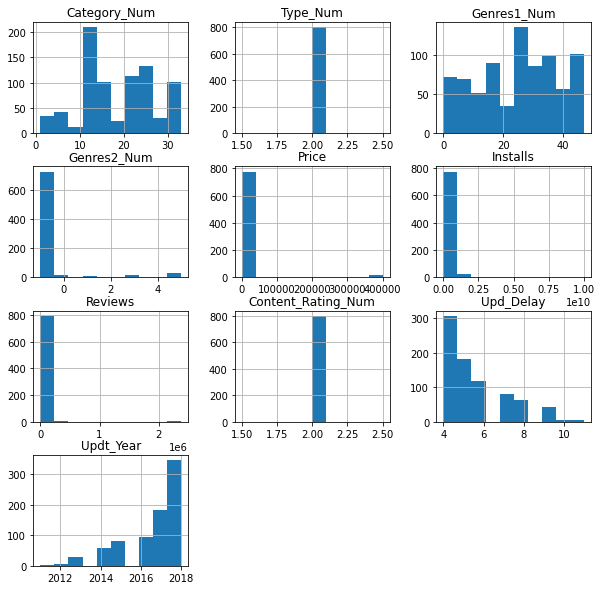

In [ ]:
def print_histograms(df):
    df.hist(figsize=[10,10])
    pyplot.show()

print_histograms(dataset_clean_dated)

{'Category_Num': -0.04118532903853088, 'Type_Num': nan, 'Genres1_Num': -0.117115201041636, 'Genres2_Num': 0.007118786118857741, 'Price': -0.018901730731456005, 'Installs': 1.0, 'Reviews': 0.8661406135722529, 'Content_Rating_Num': nan, 'Upd_Delay': -0.07067423979459193, 'Updt_Year': 0.06394360066702452}


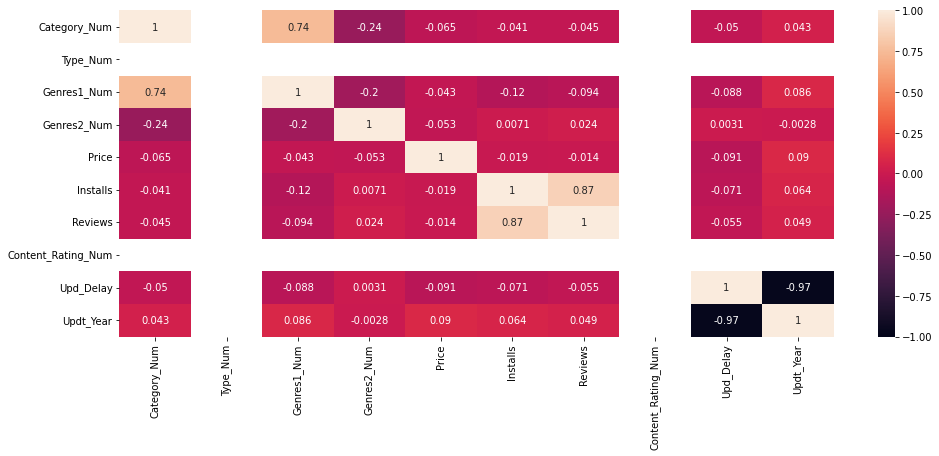

In [ ]:
#calculate the pearsons correlation coeficient of the dataset:
def compute_correlations_matrix(df):    
    #df = df.query("Category == 'FAMILY'")
    corr_df = df.corr()
    #create a dictionarry from the coef table
    corelations = corr_df.to_dict(orient='dict')
    print(corelations['Installs'])
    pyplot.figure(figsize=(16, 6))
    sns.heatmap(corr_df, vmin=-1, vmax=1, annot=True)

compute_correlations_matrix(dataset_clean_dated)

C:\Users\vikto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\plotting\_matplotlib\misc.py:100: UserWarning: Attempting to set identical left == right == 2.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
C:\Users\vikto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\plotting\_matplotlib\misc.py:101: UserWarning: Attempting to set identical bottom == top == 2.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
C:\Users\vikto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\plotting\_matplotlib\misc.py:91: UserWarning: Attempting to set identical left == right == 2.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_li

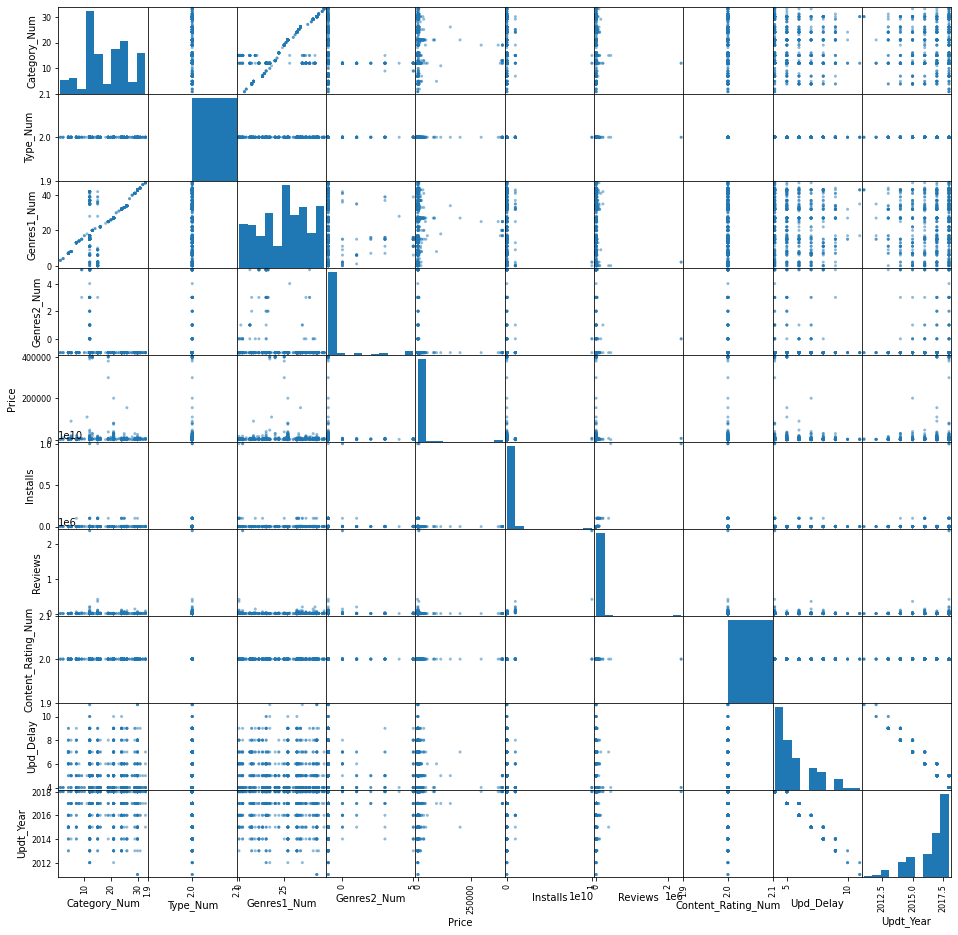

In [ ]:
def print_scatter_matrix(df):
    pd.plotting.scatter_matrix(df,figsize=([16,16]))

print_scatter_matrix(dataset_clean_dated)

In [ ]:
#get unique values from the dataframe
print(dataset_clean_dated['Category'].unique())

['BUSINESS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'GAME' 'FAMILY' 'MEDICAL'
 'PHOTOGRAPHY' 'SPORTS' 'PERSONALIZATION' 'PRODUCTIVITY' 'WEATHER' 'TOOLS'
 'TRAVEL_AND_LOCAL' 'LIFESTYLE' 'AUTO_AND_VEHICLES' 'NEWS_AND_MAGAZINES'
 'SHOPPING' 'BOOKS_AND_REFERENCE' 'SOCIAL' 'ART_AND_DESIGN'
 'VIDEO_PLAYERS' 'FINANCE' 'MAPS_AND_NAVIGATION' 'PARENTING'
 'LIBRARIES_AND_DEMO' 'EVENTS']


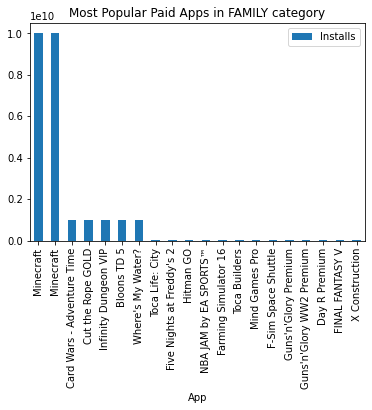

In [ ]:
#Plot with bar diagram the most populars paid apps of Family category
def popular_bar(df):
    df_bar = df.query("Category == 'FAMILY'")
    df_bar = df_bar[['App','Installs']]
    df_bar = df_bar.nlargest(n=20, columns=['Installs'])
    df_bar.plot(x = 'App', y='Installs', title='Most Popular Paid Apps in FAMILY category', kind='bar')   

popular_bar(dataset_clean_dated)


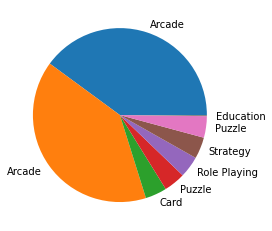

In [ ]:
#Plot with a pie diagram the most popular genres according to the number of installations from paid family

def popular_piechart(df):
    pop_pie = df.query("Category == 'FAMILY'")
    pop_pie = pop_pie[['Genres1','Installs']]
    pop_pie = pop_pie.nlargest(n=8, columns=['Installs'])
    pyplot.pie(pop_pie['Installs'],labels=pop_pie['Genres1'])

popular_piechart(dataset_clean_dated)

#dataset_clean_dated

In [ ]:
#Depending on each category, what are the ratio of download per app?: An array with the number of installation per category
def download_ratio(df):
    df_ipc = df[['Category','Installs']]
    df_ipc = df_ipc.groupby(['Category'],as_index=False).sum()
    ipc_array = df_ipc.to_numpy()
    return ipc_array

downl_ratio = download_ratio(dataset_clean_dated)
print(downl_ratio)

[['ART_AND_DESIGN' 1600000]
 ['AUTO_AND_VEHICLES' 5001500]
 ['BOOKS_AND_REFERENCE' 2213160]
 ['BUSINESS' 41207750]
 ['COMMUNICATION' 1035820500]
 ['DATING' 2103500]
 ['EDUCATION' 60200000]
 ['ENTERTAINMENT' 20000000]
 ['EVENTS' 10]
 ['FAMILY' 25626658140]
 ['FINANCE' 18506020]
 ['FOOD_AND_DRINK' 6000000]
 ['GAME' 18309819650]
 ['HEALTH_AND_FITNESS' 57401100]
 ['LIBRARIES_AND_DEMO' 1000]
 ['LIFESTYLE' 1017901100]
 ['MAPS_AND_NAVIGATION' 12101000]
 ['MEDICAL' 101550330]
 ['NEWS_AND_MAGAZINES' 505000]
 ['PARENTING' 5001000]
 ['PERSONALIZATION' 4125447940]
 ['PHOTOGRAPHY' 3097807400]
 ['PRODUCTIVITY' 141110550]
 ['SHOPPING' 1001000]
 ['SOCIAL' 600000]
 ['SPORTS' 1024308150]
 ['TOOLS' 1072344410]
 ['TRAVEL_AND_LOCAL' 18300600]
 ['VIDEO_PLAYERS' 7100000]
 ['WEATHER' 81110000]]


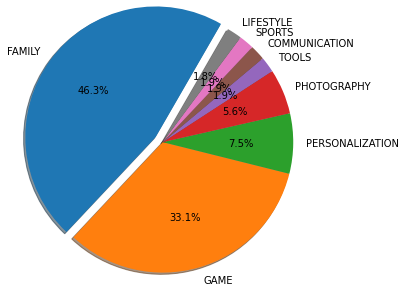

In [ ]:
#What is the size of the market: Plot a pie with the number of installation per category # & %
def mark_size(df):
    df_m_size = df[['Category','Installs']]
    df_m_size = df_m_size.groupby(['Category'],as_index=False).sum()
    m_size_pie = df_m_size.nlargest(n=8, columns=['Installs'])
    explode = (0.1, 0, 0, 0, 0, 0, 0, 0)
    pyplot.pie(m_size_pie['Installs'],labels=m_size_pie['Category'],explode=explode,autopct='%1.1f%%',shadow=True, startangle=60, radius=1.5)
    

mark_size(dataset_clean_dated)

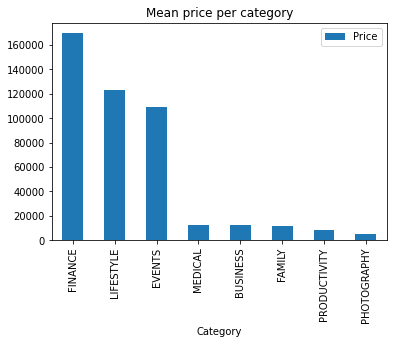

In [ ]:
#What is the size of the market: Plot a bar with the mean price per category # & %
def mark_price(df):
    df_m_price = df[['Category','Price']]
    df_m_price = df_m_price.groupby(['Category'],as_index=False).mean()
    m_price_bar = df_m_price.nlargest(n=8, columns=['Price'])
    m_price_bar.plot(x = 'Category', y='Price', title='Mean price per category', kind='bar')
    

mark_price(dataset_clean_dated)


In [ ]:
#Most expensive apps per category
def max_price(df):
    df_price_max = df[['Category','Price']]
    df_max = df_price_max.groupby('Category',as_index=False).max()
    return df_max
    

max_price(dataset_clean_dated)

,Category,Price
0,ART_AND_DESIGN,1099
1,AUTO_AND_VEHICLES,9099
2,BOOKS_AND_REFERENCE,6049
3,BUSINESS,89099
4,COMMUNICATION,19099
5,DATING,7099
6,EDUCATION,5099
7,ENTERTAINMENT,4099
8,EVENTS,109099
9,FAMILY,399099


In [ ]:
#Any additional information you will find useful for us to take the right decision.